<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/regression_ROW_FORM_PILOTIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 263 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 5.7 MB/s 
     |████████████████████████████████| 1.7 MB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 105 kB 35.7 MB/s 
     |████████████████████████████████| 6.8 MB 23.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 167 kB 47.0 MB/s 
     |████████████████████████████████| 14.4 MB 57 kB/s 
     |████████████████████████████████| 271 kB 43.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 248 kB 50.6 MB/s 
     |████████████████████████████████| 2.0 MB 28.9 MB/s 
     |████████████████████████████████| 3.1 MB 32.9 MB/s 
     |████████████████████████████████| 62 kB 774 kB/s 
     |█████████████████████

In [18]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn

In [ ]:
#data = pd.read_csv('/content/park_1st_shock.csv')

In [27]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/3.csv'
# load the dataset
df = pd.read_csv(url)

In [28]:
df.head()

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,MIDR
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.0,0.0,0.0,0.2336
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.0,0.0,0.0,2.5306
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.0,0.0,0.0,0.2576
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.0,0.0,0.0,0.2240
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.0,0.0,0.0,2.3219


In [ ]:
#reg = setup(data = data, target=data.columns[-1], session_id=99, html=False, silent=True, verbose=False)

In [29]:
reg = setup(data = df, target=df.columns[-1], session_id=99, html=False, silent=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,99
1,Target,MIDR
2,Original Data,"(1950, 19)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1364, 17)"


In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.458,0.6704,0.7607,0.2246,1.6584,0.288


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016
par,Passive Aggressive Regressor,1.0865,3.2745,1.6787,-0.7042,0.4400,1.1679,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016
par,Passive Aggressive Regressor,1.0865,3.2745,1.6787,-0.7042,0.4400,1.1679,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016
llar,Lasso Least Angle Regression,1.0321,1.9517,1.3872,-0.0148,0.5242,5.3916,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017
omp,Orthogonal Matching Pursuit,0.5574,0.6961,0.8255,0.6402,0.2666,1.2555,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020
lasso,Lasso Regression,0.5394,0.6736,0.8112,0.6520,0.2580,1.1689,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2634,0.2251,0.4698,0.8812,0.1308,0.2304,0.646
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059
en,Elastic Net,0.5223,0.6512,0.7975,0.6638,0.2496,1.0582,0.020


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2634,0.2251,0.4698,0.8812,0.1308,0.2304,0.646
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
ada,AdaBoost Regressor,0.5538,0.4823,0.6919,0.7411,0.2874,2.5560,0.152
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063
huber,Huber Regressor,0.5199,0.6555,0.7974,0.6656,0.2496,1.3578,0.059


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2634,0.2251,0.4698,0.8812,0.1308,0.2304,0.646
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
gbr,Gradient Boosting Regressor,0.2884,0.2405,0.4854,0.8717,0.1405,0.3973,0.197
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
ada,AdaBoost Regressor,0.5538,0.4823,0.6919,0.7411,0.2874,2.5560,0.152
knn,K Neighbors Regressor,0.3926,0.5102,0.7037,0.7350,0.2037,0.4030,0.063


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2450,0.1999,0.4410,0.8943,0.1213,0.2660,0.131
et,Extra Trees Regressor,0.2634,0.2251,0.4698,0.8812,0.1308,0.2304,0.646
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
gbr,Gradient Boosting Regressor,0.2884,0.2405,0.4854,0.8717,0.1405,0.3973,0.197
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
ada,AdaBoost Regressor,0.5538,0.4823,0.6919,0.7411,0.2874,2.5560,0.152


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2450,0.1999,0.4410,0.8943,0.1213,0.2660,0.131
et,Extra Trees Regressor,0.2634,0.2251,0.4698,0.8812,0.1308,0.2304,0.646
rf,Random Forest Regressor,0.2688,0.2274,0.4726,0.8792,0.1319,0.2295,0.824
gbr,Gradient Boosting Regressor,0.2884,0.2405,0.4854,0.8717,0.1405,0.3973,0.197
dt,Decision Tree Regressor,0.3373,0.3768,0.6093,0.8012,0.1716,0.2777,0.028
lr,Linear Regression,0.4667,0.4580,0.6704,0.7607,0.2246,1.6584,0.288
ridge,Ridge Regression,0.4653,0.4604,0.6717,0.7603,0.2230,1.6361,0.016
br,Bayesian Ridge,0.4655,0.4603,0.6717,0.7602,0.2233,1.6418,0.017
lar,Least Angle Regression,0.4920,0.4876,0.6925,0.7423,0.2390,1.6390,0.019
ada,AdaBoost Regressor,0.5538,0.4823,0.6919,0.7411,0.2874,2.5560,0.152


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
best = create_model("lightgbm", fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2554,0.2806,0.5297,0.8756,0.1231,0.3961
1,0.2932,0.2680,0.5177,0.8357,0.1398,0.2210
2,0.2873,0.2500,0.5000,0.8855,0.1470,0.2520
3,0.2802,0.2501,0.5001,0.9054,0.1266,0.2257
4,0.2005,0.1160,0.3406,0.9068,0.1112,0.2215
5,0.2341,0.2010,0.4484,0.8807,0.1218,0.2362
6,0.2479,0.2126,0.4610,0.9185,0.1102,0.2979
7,0.2249,0.1738,0.4169,0.8787,0.1182,0.2405
8,0.1843,0.0886,0.2977,0.9544,0.0964,0.3513
9,0.2423,0.1582,0.3978,0.9019,0.1190,0.2182


In [32]:
tuned_model = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2944,0.3082,0.5551,0.8634,0.1366,0.5920
1,0.3022,0.2688,0.5185,0.8352,0.1463,0.2464
2,0.3047,0.2728,0.5223,0.8751,0.1607,0.5140
3,0.3149,0.3016,0.5492,0.8859,0.1445,0.2966
4,0.2353,0.1604,0.4005,0.8712,0.1282,0.2635
5,0.2312,0.1503,0.3877,0.9108,0.1232,0.3212
6,0.2550,0.2000,0.4472,0.9234,0.1125,0.3523
7,0.2696,0.2089,0.4571,0.8542,0.1373,0.4220
8,0.2233,0.1388,0.3725,0.9286,0.1137,0.4268
9,0.2577,0.1586,0.3982,0.9017,0.1252,0.4725


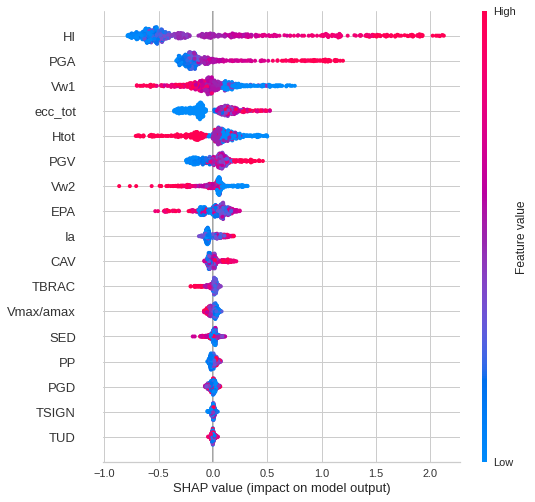

In [33]:
interpret_model(tuned_model)

In [35]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…